# 08 - lab 26 - sprawozdanie


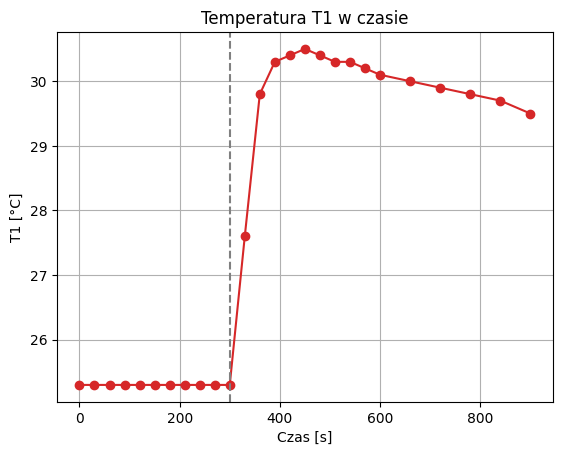

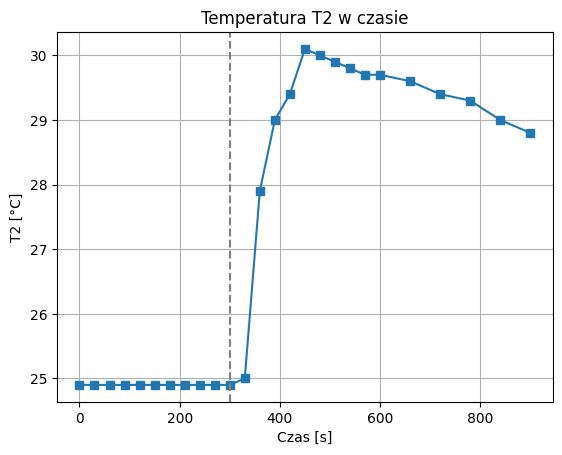

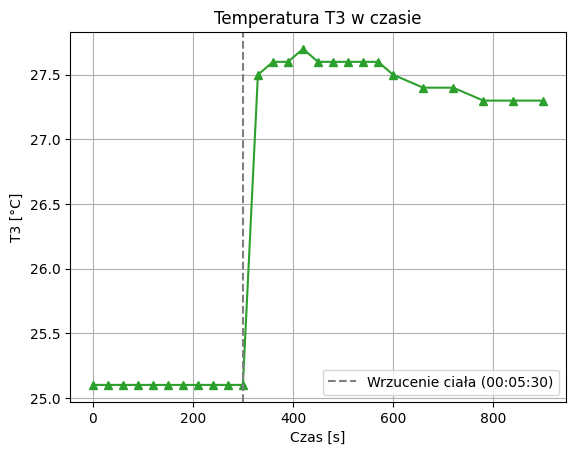

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Dane
# fmt: off
data = {
    "t": [ 0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600, 660, 720, 780, 840, 900, ],
    "T1": [ 25.3, 25.3, 25.3, 25.3, 25.3, 25.3, 25.3, 25.3, 25.3, 25.3, 25.3, 27.6, 29.8, 30.3, 30.4, 30.5, 30.4, 30.3, 30.3, 30.2, 30.1, 30.0, 29.9, 29.8, 29.7, 29.5, ],
    "T2": [ 24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 24.9, 25.0, 27.9, 29.0, 29.4, 30.1, 30.0, 29.9, 29.8, 29.7, 29.7, 29.6, 29.4, 29.3, 29.0, 28.8, ],
    "T3": [ 25.1, 25.1, 25.1, 25.1, 25.1, 25.1, 25.1, 25.1, 25.1, 25.1, 25.1, 27.5, 27.6, 27.6, 27.7, 27.6, 27.6, 27.6, 27.6, 27.6, 27.5, 27.4, 27.4, 27.3, 27.3, 27.3, ],
}
# fmt: on

df = pd.DataFrame(data)

# Wykres T1
plt.figure()
plt.plot(df["t"], df["T1"], marker="o", color="tab:red")
plt.axvline(x=300, color="gray", linestyle="--", label="Wrzucenie ciała (00:05:30)")
plt.title("Temperatura T1 w czasie")
plt.xlabel("Czas [s]")
plt.ylabel("T1 [°C]")
# plt.xticks(rotation=45)
plt.grid(True)

# Wykres T2
plt.figure()
plt.plot(df["t"], df["T2"], marker="s", color="tab:blue")
plt.axvline(x=300, color="gray", linestyle="--", label="Wrzucenie ciała (00:05:30)")
plt.title("Temperatura T2 w czasie")
plt.xlabel("Czas [s]")
plt.ylabel("T2 [°C]")
# plt.xticks(rotation=45)
plt.grid(True)

# Wykres T3
plt.figure()
plt.plot(df["t"], df["T3"], marker="^", color="tab:green")
plt.axvline(x=300, color="gray", linestyle="--", label="Wrzucenie ciała (00:05:30)")
plt.title("Temperatura T3 w czasie")
plt.xlabel("Czas [s]")
plt.ylabel("T3 [°C]")
# plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.show()

In [19]:
def plot_temperature_analysis(df, series_name, interpolation_time=300, n=10):
    """
    Analyze and plot temperature data with trend lines.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing time and temperature data
    series_name : str
        Name of the temperature series to analyze (e.g., 'T1', 'T2', 'T3')
    interpolation_time : int, optional
        Time point for temperature interpolation (default: 300)
    n : int, optional
        Number of points to use for trend line fitting (default: 10)
    """
    # Get time and temperature slices
    time_slice_start = df["t"].head(n)
    temp_slice_start = df[series_name].head(n)
    time_slice_end = df["t"].tail(n)
    temp_slice_end = df[series_name].tail(n)

    # Fit lines to the data
    slope_start, intercept_start = np.polyfit(time_slice_start, temp_slice_start, 1)
    slope_end, intercept_end = np.polyfit(time_slice_end, temp_slice_end, 1)

    # Calculate interpolated temperatures at interpolation_time
    t_p = (
        slope_start * interpolation_time + intercept_start
    )  # Temperature at interpolation_time from start line
    t_k = (
        slope_end * interpolation_time + intercept_end
    )  # Temperature at interpolation_time from end line

    print(f"Temperatura początkowa (t_p): {t_p:.2f}°C")
    print(f"Temperatura końcowa (t_k): {t_k:.2f}°C")

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(df["t"], df[series_name], marker="o", color="tab:red", label=series_name)
    plt.plot(
        df["t"],
        slope_start * df["t"] + intercept_start,
        "--",
        color="blue",
        label="Linia trendu (początek)",
    )
    plt.plot(
        df["t"],
        slope_end * df["t"] + intercept_end,
        "--",
        color="green",
        label="Linia trendu (koniec)",
    )
    plt.axvline(
        x=interpolation_time,
        color="gray",
        linestyle="--",
        label=f"Punkt interpolacji ({interpolation_time//60:02d}:{(interpolation_time%60):02d})",
    )
    plt.title(f"Temperatura {series_name} w czasie")
    plt.xlabel("Czas [s]")
    plt.ylabel("Temperatura [°C]")
    plt.grid(True)
    plt.legend()
    plt.show()

    return t_p, t_k

Temperatura początkowa (t_p): 25.30°C
Temperatura końcowa (t_k): 30.67°C


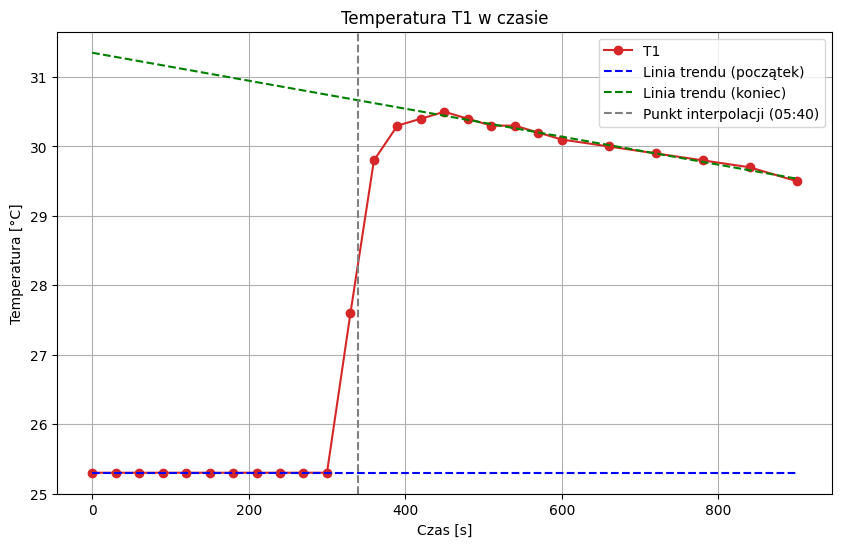

Temperatura początkowa (t_p): 24.90°C
Temperatura końcowa (t_k): 30.29°C


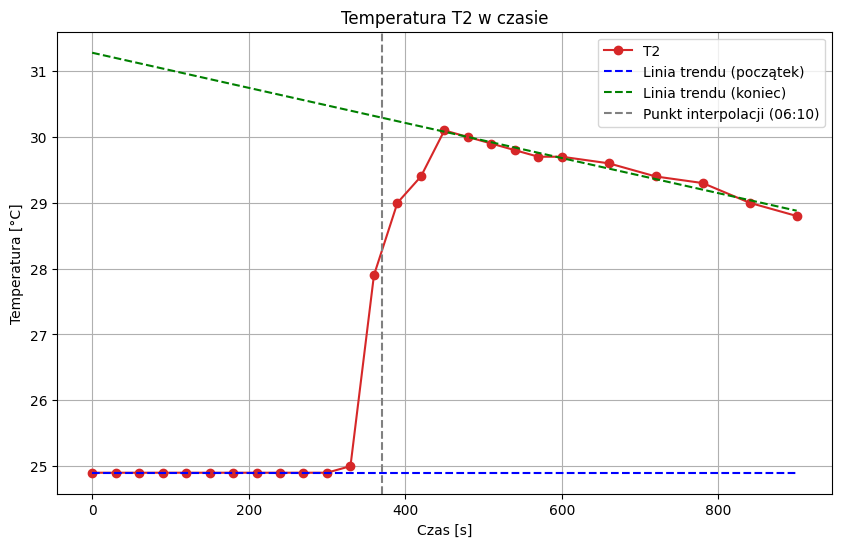

Temperatura początkowa (t_p): 25.10°C
Temperatura końcowa (t_k): 27.75°C


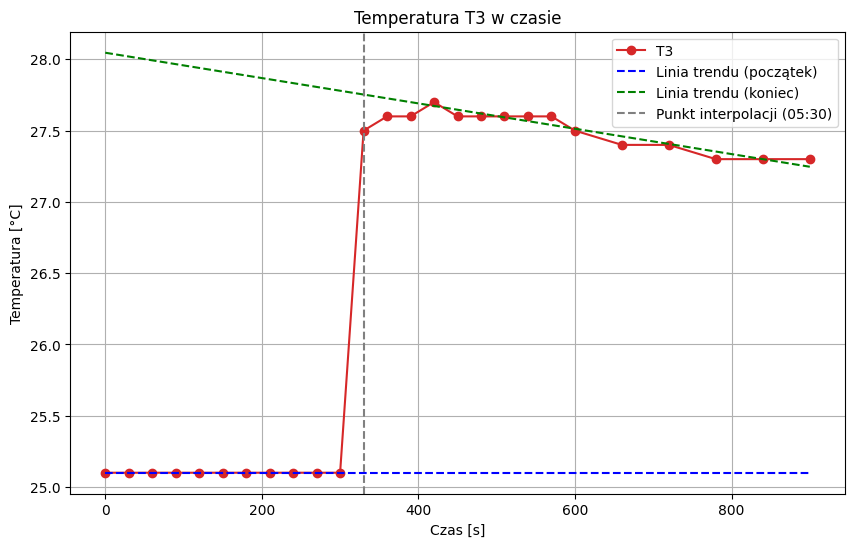

(np.float64(25.100000000000012), np.float64(27.753333333333345))

In [20]:
plot_temperature_analysis(df, "T1", interpolation_time=340)

plot_temperature_analysis(df, "T2", interpolation_time=370)

plot_temperature_analysis(df, "T3", interpolation_time=330)

## Ciepła właściwe

$$
    c_p = \frac{[m_w \cdot c_w + m_n \cdot c_n] \cdot (T_p - T_k)}{m_c \cdot (T_k - T_c)}
$$


In [21]:
# Tp1 = 25.30  # Temperatura początkowa dla ciała miedzianego
# Tk1 = 30.75  # Temperatura końcowa dla ciała miedzianego

# Tp2 = 24.90  # Temperatura początkowa dla ciała mosiężnego
# Tk2 = 30.40  # Temperatura końcowa dla ciała mosiężnego

# Tp3 = 25.10  # Temperatura początkowa dla ciała aluminiowego
# Tk3 = 27.78  # Temperatura końcowa dla ciała aluminiowego

Tp1 = 25.30  # Temperatura początkowa dla ciała miedzianego
Tk1 = 30.67  # Temperatura końcowa dla ciała miedzianego

Tp2 = 24.90  # Temperatura początkowa dla ciała mosiężnego
Tk2 = 30.29  # Temperatura końcowa dla ciała mosiężnego

Tp3 = 25.10  # Temperatura początkowa dla ciała aluminiowego
Tk3 = 27.75  # Temperatura końcowa dla ciała aluminiowego

Tc1 = 100.2
Tc2 = 100.4
Tc3 = 102.4

m_w1 = 0.0668
m_w2 = 0.0612
m_w3 = 0.0756

m_n = 0.1261
c_w = 4186
c_n = 377
m_1 = 0.073
m_2 = 0.0708
m_3 = 0.0152


def cieplo_wlasciwe(Tp, Tk, Tc, m_w, m_n, c_w, c_n, m_c):
    return (m_w * c_w + m_n * c_n) * (Tp - Tk) / (m_c * (Tk - Tc))


c1 = cieplo_wlasciwe(Tp1, Tk1, Tc1, m_w1, m_n, c_w, c_n, m_1)
c2 = cieplo_wlasciwe(Tp2, Tk2, Tc2, m_w2, m_n, c_w, c_n, m_2)
c3 = cieplo_wlasciwe(Tp3, Tk3, Tc3, m_w3, m_n, c_w, c_n, m_3)

print(c1)
print(c2)
print(c3)

c1_target = 385
c2_target = 375
c3_target = 900

print(c1_target - c1)
print(c2_target - c2)
print(c3_target - c3)


def relative_difference(measured, target):
    """
    Oblicza względną różnicę między wartością zmierzoną a docelową.

    Parametry:
    -----------
    measured : float
        Wartość zmierzona
    target : float
        Wartość docelowa

    Zwraca:
    --------
    float
        Względna różnica w procentach
    """
    return abs((measured - target) / target) * 100


print(f"Względna różnica dla miedzi: {relative_difference(c1, c1_target):.2f}%")
print(f"Względna różnica dla mosiądzu: {relative_difference(c2, c2_target):.2f}%")
print(f"Względna różnica dla aluminium: {relative_difference(c3, c3_target):.2f}%")

346.1348831390412
329.8018430682373
850.1105553988783
38.86511686095878
45.198156931762696
49.88944460112168
Względna różnica dla miedzi: 10.09%
Względna różnica dla mosiądzu: 12.05%
Względna różnica dla aluminium: 5.54%


In [22]:
def cieplo_wlasciwe_z_niepewnoscia(
    Tp, Tk, Tc, m_w, m_n, c_w, c_n, m_i, niepewnosci=None
):
    """
    Oblicza ciepło właściwe ciała stałego oraz jego niepewność.
    Wartości c_w i c_n są traktowane jako dokładne (odczytane z tabel).

    Parametry:
    -----------
    Tp : float
        Temperatura początkowa wody (°C)
    Tk : float
        Temperatura końcowa układu (°C)
    Tc : float
        Temperatura początkowa badanego ciała (°C)
    m_w : float
        Masa wody (kg)
    m_n : float
        Masa naczynia kalorymetrycznego (kg)
    c_w : float
        Ciepło właściwe wody (J/kg·K) - z tablic
    c_n : float
        Ciepło właściwe naczynia (J/kg·K) - z tablic
    m_i : float
        Masa badanego ciała (kg)
    niepewnosci : dict, optional
        Słownik zawierający niepewności dla każdego parametru:
        {'Tp': float, 'Tk': float, 'Tc': float, 'm_w': float,
         'm_n': float, 'm_i': float}

    Zwraca:
    --------
    tuple : (float, float lub None)
        Ciepło właściwe (J/kg·K) i jego niepewność (jeśli podano niepewności)
    """
    # Obliczanie zmian temperatury
    delta_T = Tp - Tk  # Zmiana temperatury wody + naczynia
    delta_T_i = Tk - Tc  # Zmiana temperatury badanego ciała

    # Obliczanie iloczynu pojemności cieplnej
    Q = m_w * c_w + m_n * c_n

    # Obliczanie ciepła właściwego
    c_i = (Q * delta_T) / (m_i * delta_T_i)

    # Obliczanie niepewności, jeśli podano
    niepewnosc = None
    if niepewnosci:
        # Pochodne cząstkowe zgodnie z podanymi wzorami
        d_c_i_d_m_w = (c_w * delta_T) / (m_i * delta_T_i)
        d_c_i_d_m_n = (c_n * delta_T) / (m_i * delta_T_i)
        d_c_i_d_delta_T = Q / (m_i * delta_T_i)
        d_c_i_d_m_i = -c_i / m_i
        d_c_i_d_delta_T_i = -c_i / delta_T_i

        # print(f"∂c_i/∂m_w = (c_w * ΔT) / (m_i * ΔT_i) = {d_c_i_d_m_w:.6f}")
        # print(f"∂c_i/∂m_n = (c_n * ΔT) / (m_i * ΔT_i) = {d_c_i_d_m_n:.6f}")
        # print(f"∂c_i/∂ΔT = Q / (m_i * ΔT_i) = {d_c_i_d_delta_T:.6f}")
        # print(f"∂c_i/∂m_i = -c_i / m_i = {d_c_i_d_m_i:.6f}")
        # print(f"∂c_i/∂ΔT_i = -c_i / ΔT_i = {d_c_i_d_delta_T_i:.6f}")

        # Obliczanie składników niepewności
        u_m_w = abs(d_c_i_d_m_w) * niepewnosci.get("m_w", 0)
        u_m_n = abs(d_c_i_d_m_n) * niepewnosci.get("m_n", 0)

        # Dla niepewności temperatur
        u_Tp = abs(d_c_i_d_delta_T) * niepewnosci.get("Tp", 0)
        u_Tk_delta_T = abs(d_c_i_d_delta_T) * niepewnosci.get("Tk", 0)
        u_Tk_delta_T_i = abs(d_c_i_d_delta_T_i) * niepewnosci.get("Tk", 0)
        u_Tc = abs(d_c_i_d_delta_T_i) * niepewnosci.get("Tc", 0)

        u_m_i = abs(d_c_i_d_m_i) * niepewnosci.get("m_i", 0)

        # Całkowita niepewność (metoda błędu maksymalnego)
        niepewnosc = u_m_w + u_m_n + u_Tp + u_Tk_delta_T + u_Tk_delta_T_i + u_Tc + u_m_i

    return c_i, niepewnosc

In [23]:
niepewnosci = {
    "Tp": 0.1,  # K (niepewność termometru)
    "Tk": 0.1,  # K (niepewność termometru)
    "Tc": 0.1,  # K (niepewność termometru)
    "m_w": 0.0001,  # kg (niepewność wagi)
    "m_n": 0.0001,  # kg (niepewność wagi)
    "m_i": 0.0001,  # kg (niepewność wagi)
}

# Obliczenie ciepła właściwego i niepewności dla wszystkich ciał
c1, delta_c1 = cieplo_wlasciwe_z_niepewnoscia(
    Tp1, Tk1, Tc1, m_w1, m_n, c_w, c_n, m_1, niepewnosci
)

c2, delta_c2 = cieplo_wlasciwe_z_niepewnoscia(
    Tp2, Tk2, Tc2, m_w2, m_n, c_w, c_n, m_2, niepewnosci
)

c3, delta_c3 = cieplo_wlasciwe_z_niepewnoscia(
    Tp3, Tk3, Tc3, m_w3, m_n, c_w, c_n, m_3, niepewnosci
)

print(f"Ciepło właściwe ciała 1 (miedź): {c1:.2f} ± {delta_c1:.2f} J/(kg·K)")
print(f"Ciepło właściwe ciała 2 (mosiądz): {c2:.2f} ± {delta_c2:.2f} J/(kg·K)")
print(f"Ciepło właściwe ciała 3 (aluminium): {c3:.2f} ± {delta_c3:.2f} J/(kg·K)")

Ciepło właściwe ciała 1 (miedź): 346.13 ± 14.84 J/(kg·K)
Ciepło właściwe ciała 2 (mosiądz): 329.80 ± 14.14 J/(kg·K)
Ciepło właściwe ciała 3 (aluminium): 850.11 ± 73.10 J/(kg·K)
